# Overlapping (H2O+CO2) B10 cosz0.5 mls result

### Input Parameter Options
    Band 10 (4400 - 8200)
    vstar = 4400
    nband = 380
    nv = 10000
    dv = 0.001
    cosz = 0.5
    rsfc = 0.0
    include 'mls75.pro'

### Note
    ~_flux    <- (LBL, PAR (CLIRAD), diff.)x1, (LBL, PAR (CLIRAD), diff.)x2
    ~_heat   <- (LBL, PAR (CLIRAD), diff.)x1, (LBL, PAR (CLIRAD), diff.)x2

In [1]:
import numpy as np
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

path = './'
fname = 'Ovlap_B10_cosz0.5_mls75_'

### Flux

In [2]:
flx = pd.read_table(path+'B10_all.flx',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                    names=['hPa','LBLx1','PARx1','PARx1 - LBLx1','LBLx2','PARx2','PARx2 - LBLx2'])
pd.concat([flx[flx.index == 0.], flx[flx.index == 1013.]])

,LBLx1,PARx1,PARx1 - LBLx1,LBLx2,PARx2,PARx2 - LBLx2
hPa,,,,,,
0.0,113.87450,113.87450,0.00000,113.87450,113.87450,0.00000
1013.0,63.42747,63.21363,-0.21384,62.48809,62.19653,-0.29156


In [3]:
## save flux data to excel
sav = pd.DataFrame(flx)
sav.to_csv(fname+"flux.csv",header=True,index=True)
fn = fname+'flux.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### Figures (CO2x1)

In [4]:
htr = pd.read_table(path+'B10_all.htr',header=None,sep="\s+",keep_default_na=False,
                    names=['hPa','LBLx1','PARx1','PARx1 - LBLx1','LBLx2','PARx2','PARx2 - LBLx2'])

params = {'figure.figsize': (20,9),'legend.fontsize': 20,'axes.labelsize': 20,'axes.titlesize': 30,'xtick.labelsize': 20,'ytick.labelsize': 20}
plt.rcParams.update(params)

minx = -0.01
max1 = 0.8
max2 = 0.8

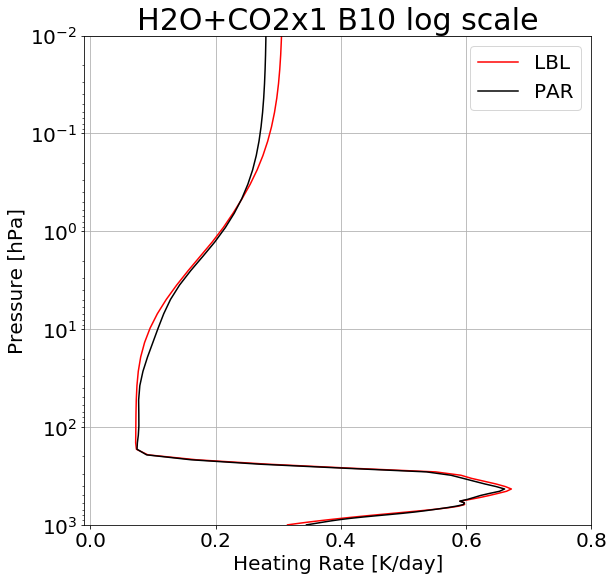

In [5]:
# log scale
plt.subplot(1,2,1)
plt.axis([minx,max1,1000,0.01])
plt.grid()
plt.title('H2O+CO2x1 B10 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBLx1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['PARx1'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

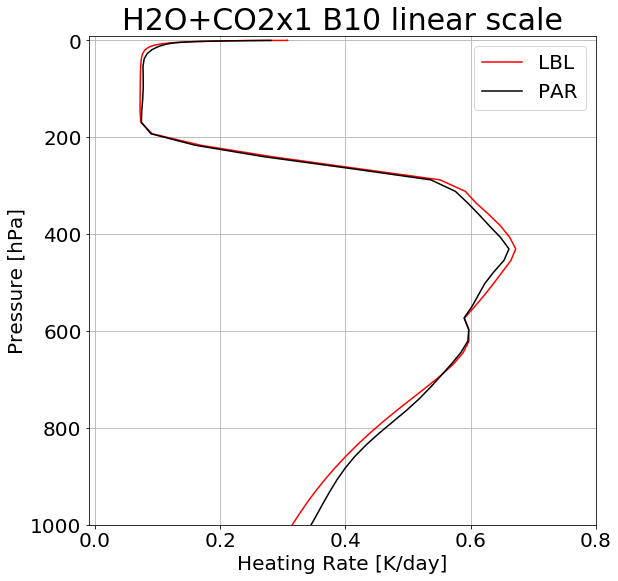

In [6]:
# linear scale
plt.subplot(1,2,2)
plt.axis([minx,max2,1000,-10])
plt.grid()
plt.title('H2O+CO2x1 B10 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBLx1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['PARx1'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

### Figures (CO2x2)

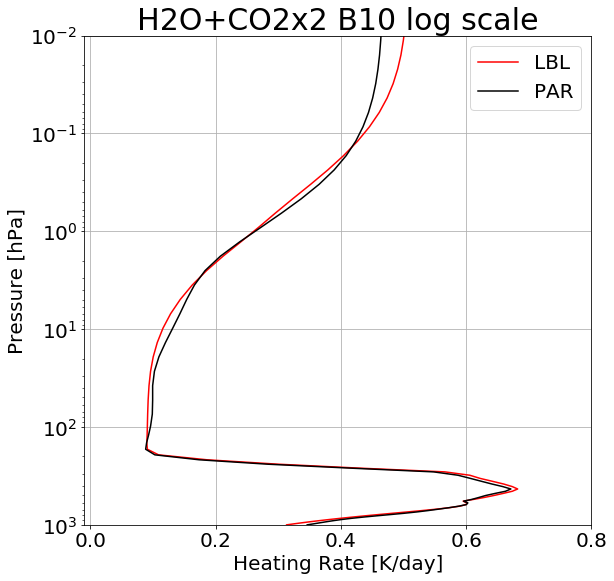

In [7]:
# log scale
plt.subplot(1,2,1)
plt.axis([minx,max1,1000,0.01])
plt.grid()
plt.title('H2O+CO2x2 B10 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBLx2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['PARx2'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

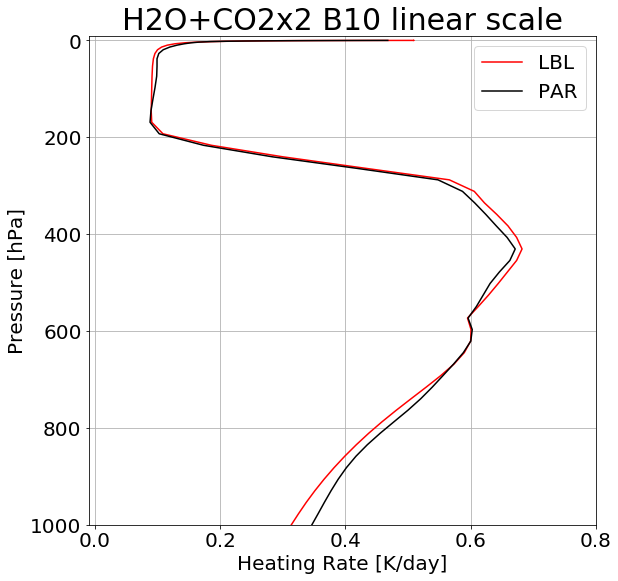

In [8]:
# linear scale
plt.subplot(1,2,2)
plt.axis([minx,max2,1000,-10])
plt.grid()
plt.title('H2O+CO2x2 B10 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBLx2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['PARx2'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

In [9]:
## save heating rate to excel for lbl
sav = pd.DataFrame(htr)
sav.to_csv(fname+"heat.csv",header=True,index=False)
fn = fname+'heat.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

In [10]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')